In [721]:
import scipy.stats as stats
import scipy.ndimage as ndimage
import numpy as np
import nibabel as nb
import os
import fnmatch
import matplotlib.pyplot as plt
import matplotlib
from copy import copy
import itertools

In [499]:
%matplotlib inline

In [756]:
#display entire array
np.set_printoptions(threshold='nan')

In [501]:
# location of original t-score nifti files
where_files = '/home/yoobinkwak/trial_CHR_rsFC/group_ave_FC'

In [502]:
#make list of files whose filename matches with the string pattern
files = [f for f in os.listdir(where_files) if fnmatch.fnmatch(f,'*corrp*')]

In [503]:
#don't know why, but files were not in order
#load nifti file
for i in sorted(files):
    t = nb.load(os.path.join(where_files, i))
    t_data = t.get_data()
    t_nonzero = t_data[t_data.nonzero()] #assign a variable to nonzero values
    t_nonzero[t_nonzero < 0.5] = 0 #among nonzero values, zero the ones smaller than 0.5
    t_data[t_data.nonzero()] = t_nonzero #overwrite nonzero values
    t_thr = nb.Nifti1Image(t_data, t.affine) #convert back to nifti file
    t_thr.to_filename(i+'_0.5.nii.gz') #name new nifti file

In [504]:
#make separate lists of each category
#outputs from t > 0.5
t_3ds_20 = [f for f in os.listdir(os.getcwd()) if fnmatch.fnmatch(f, '*3ds*'+'*20*'+'*0.5.nii.gz')]
t_3ds_10 = [f for f in os.listdir(os.getcwd()) if fnmatch.fnmatch(f, '*3ds*'+'*10*'+'*0.5.nii.gz')]
t_4ds_20 = [f for f in os.listdir(os.getcwd()) if fnmatch.fnmatch(f, '*4ds*'+'*20*'+'*0.5.nii.gz')]

In [505]:
t_3ds_20

['randomised_3ds_bp_fnirt_20_IC05.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC01.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC00.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC17.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC03.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC13.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC04.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC15.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC02.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC12.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC19.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC07.nii.gz_tfce_corrp_tstat1.nii.gz_0.5.nii.gz',
 'randomised_3ds_bp_fnirt_20_IC09.nii.gz_tfce_corrp_

In [723]:
#create an empty list
mat_list_3ds_20 = []

In [724]:
# load each nifti file from each category, convert to matrix, and add to the matrix list
for j in sorted(t_3ds_20):
    j_mat = nb.load(os.path.join(os.getcwd(), j)).get_data()
    mat_list_3ds_20.append(j_mat) #mat_list contains 20 (60,72,60) matrices
stack_3ds_20 = np.stack(mat_list_3ds_20, axis=3) #stack matrices via np.stack(matrix_list, along a new_axis) --> stack_3ds_20 becomes a (60,72,60,20) matrix
find_biggest_3ds_20 = np.argmax(stack_3ds_20, axis=3) #get the index of the maximum value along axis 3 (returns the component #)
find_biggest_3ds_20_1mm = ndimage.zoom(find_biggest_3ds_20,(3,3,3)) #match data shape and pixel size with MNI_1mm for better resolution

In [558]:
find_biggest_3ds_20[find_biggest_3ds_20.nonzero()] #what find_biggest_3ds_20 contains

array([ 5, 19,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  5,  5,  1,  1,  1,  5, 16,  5,  5,
        1, 19,  5,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,  1,  5,  1,  1,
        1,  1,  5,  1,  1,  1,  1,  1,  5,  5,  5,  1,  1,  1,  1,  1,  5,
        5,  5,  5,  5,  5,  1,  5,  5, 14,  9,  5,  5,  5,  5,  5,  5,  5,
        9,  8,  8,  5,  5,  5,  5,  1,  5,  5,  5,  5,  1,  1,  3,  1,  1,
        1,  5,  5,  1,  1,  1,  1,  1,  1,  5,  5,  1,  1,  1,  1,  1,  5,
        9,  1,  1,  1,  1,  1,  5,  8,  1,  1,  1,  1,  1,  1,  1,  8,  6,
        1,  1,  1,  1,  1,  1,  1,  6,  6,  1,  1, 16,  1,  1,  1,  1,  1,
        1,  1, 19,  1,  1,  1,  1,  1,  1,  1,  8,  1,  9,  1,  1,  8,  1,
        1,  3,  1,  1,  1,  8,  1,  1,  5,  5,  5,  5,  5,  5,  5, 18,  5,
        5,  5,  5,  5,  5, 11, 11,  1,  1,  5,  5,  5,  1,  8, 16,  1,  1,
        1,  9,  5, 11,  8,  1,  1,  1,  1,  1,  9,  5,  1,  3,  3,  1,  1,
        1,  1,  1,  8,  1

In [729]:
find_biggest_4ds_20.shape

(45, 54, 45)

In [712]:
find_biggest_3ds_20_1mm = ndimage.zoom(find_biggest_3ds_20,(3,3,3))

In [716]:
find_biggest_3ds_20_1mm.shape

(180, 216, 180)

###### my_cmap = copy(matplotlib.cm.get_cmap('jet')) # make a copy so we don't mess up system copy
my_cmap.set_under('r', alpha=0) # make locations over vmax translucent red

In [733]:
#flirt -in MNI -ref MNI -applyisoxfm 3 -interp nearestneighbour
mni_1mm = nb.load('/usr/share/fsl/data/standard/MNI152_T1_1mm.nii.gz')

In [734]:
mni_1mm_data = mni_3ds.get_data()

In [735]:
mni_1mm_data.shape

(182, 218, 182)

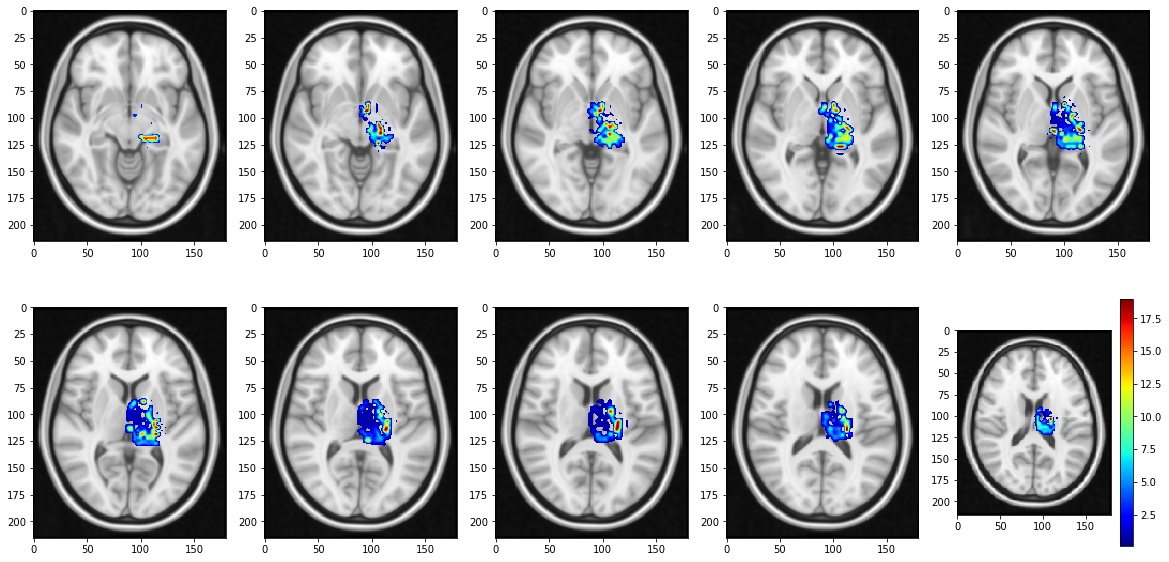

In [754]:
#3ds_20 graph
thal_starts = 63
columns=5
rows=2
fig, axes = plt.subplots(ncols=columns, nrows=rows, figsize=(20,10))
s = axes[0,0].imshow(find_biggest_3ds_20_1mm[:,:,78].T, cmap=my_cmap, vmin = 0.1)
for i, j in itertools.product(range(rows),range(columns)):
    axes[i,j].imshow(np.flipud(mni_1mm_data[:,:,thal_starts].T), cmap='gray')
    axes[i,j].imshow(np.flipud(find_biggest_3ds_20_1mm[:,:,thal_starts].T), cmap=my_cmap, vmin = 0.1)
    thal_starts+=3
plt.colorbar(s)
plt.show()

In [725]:
#3ds_10
mat_list_3ds_10 = []
for k in t_3ds_10:
    k_mat = nb.load(os.path.join(os.getcwd(), k)).get_data()
    mat_list_3ds_10.append(k_mat)
stack_3ds_10 = np.stack(mat_list_3ds_10, axis=3)
find_biggest_3ds_10 = np.argmax(stack_3ds_10, axis=3)
find_biggest_3ds_10_1mm = ndimage.zoom(find_biggest_3ds_10,(3,3,3))

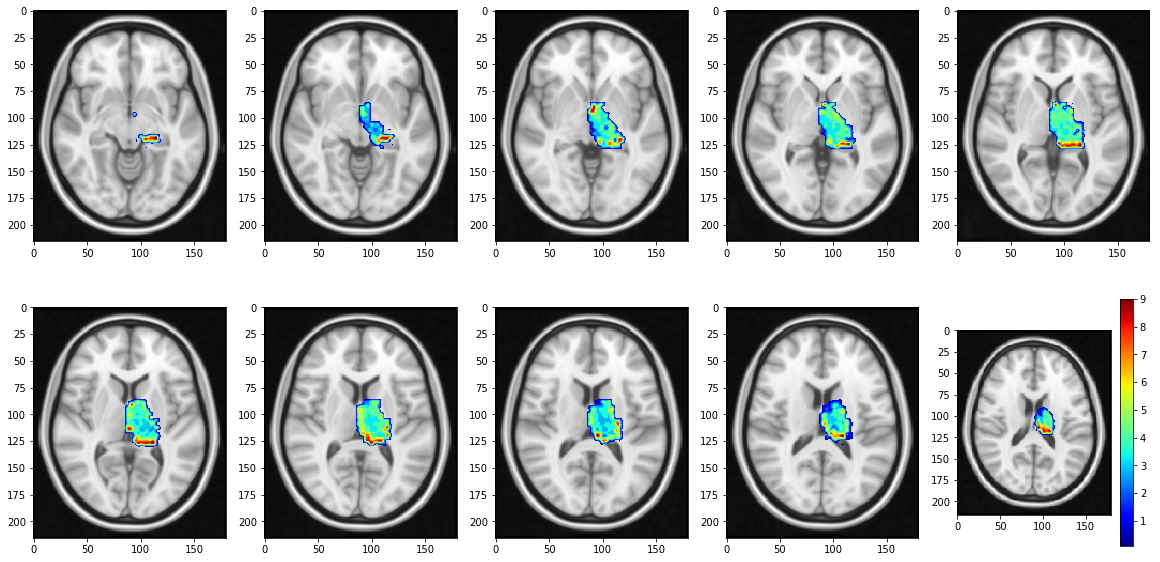

In [753]:
thal_starts = 63
columns=5
rows=2
fig, axes = plt.subplots(ncols=columns, nrows=rows, figsize=(20,10))
s = axes[0,0].imshow(find_biggest_3ds_10_1mm[:,:,63].T, cmap=my_cmap, vmin=0.1)
for i, j in itertools.product(range(rows),range(columns)):
    axes[i,j].imshow(np.flipud(mni_1mm_data[:,:,thal_starts].T), cmap='gray')
    axes[i,j].imshow(np.flipud(find_biggest_3ds_10_1mm[:,:,thal_starts].T), cmap=my_cmap, vmin=0.1)
    thal_starts+=3
plt.colorbar(s)
plt.show()

In [742]:
#4ds_20
mat_list_4ds_20 = []
for l in t_4ds_20:
    l_mat = nb.load(os.path.join(os.getcwd(), l)).get_data()
    mat_list_4ds_20.append(l_mat)
stack_4ds_20 = np.stack(mat_list_4ds_20, axis=3)
find_biggest_4ds_20 = np.argmax(stack_4ds_20, axis=3)
find_biggest_4ds_20_1mm = ndimage.zoom(find_biggest_3ds_20,(4,4,4))

In [755]:
thal_starts=30
columns=4
rows=2
fig, axes = plt.subplots(ncols=columns, nrows=rows, figsize=(16,8))
s = axes[0,0].imshow(find_biggest_4ds_20_1mm[:,:,30].T, cmap=my_cmap, vmin=0.01)
for i, j in itertools.product(range(rows),range(columns)):
    axes[i,j].imshow(np.flipud(mni_1mm_data[:,:,thal_starts].T), cmap='gray')
    axes[i,j].imshow(np.flipud(find_biggest_4ds_20_1mm[:,:,thal_starts].T), cmap=my_cmap, vmin=0.01)
    thal_starts+=4
plt.colorbar(s)
plt.show()

ValueError: minvalue must be less than or equal to maxvalue